In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import os
from glob import glob

In [3]:
companies = ["AMAZON", "APPLE", "META", "GOOGLE", "NETFLIX"]
frequency = "daily"
path = os.getcwd()

files = glob(f"/diploma_info/data/*_{frequency}.csv")
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [4]:
columns = ['open_price', 'highest_price', 'lowest_price', 'close_price', 'adj_close_price', 'volume']

meta = pd.read_csv(
    files[2], 
    parse_dates=['Date'],
    date_parser=dateparse,
    index_col=['Date']
)
meta.columns = columns
meta.index.name = 'date'

C:\Users\Admin\AppData\Local\Temp\ipykernel_14652\892827597.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  meta = pd.read_csv(


In [5]:
meta['year'] = meta.index.year
meta['month'] = meta.index.month
meta['day'] = meta.index.day
meta['day_of_week'] = meta.index.weekday
meta['week_of_year'] = (meta.index.isocalendar()['week']).astype('int')

In [6]:
meta

,open_price,highest_price,lowest_price,close_price,adj_close_price,volume,year,month,day,day_of_week,week_of_year
date,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,8,19,3,34
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,8,20,4,34
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,8,23,0,35
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,8,24,1,35
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,8,25,2,35
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,140.889999,143.880005,138.169998,143.539993,143.539993,42116900,2024,2,2,4,5
2024-02-05,144.039993,146.669998,143.910004,144.929993,144.929993,29254400,2024,2,5,0,6
2024-02-06,145.960007,146.740005,144.520004,145.410004,145.410004,21517700,2024,2,6,1,6


In [7]:
from sklearn.ensemble import RandomForestRegressor

import xgboost
from xgboost import XGBRegressor

In [8]:
model_xgb = XGBRegressor(**{
    'n_estimators': 500,
    'n_jobs': -1,
    'max_depth': 6,
    'eta': 0.3,
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'subsample': 1,
    'colsample_bytree': 1,
    'min_child_weight': 1,
    'random_state': 7,
})

In [9]:
# X_train = meta.loc[:'2023-10-01', list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_train = meta.loc[:'2023-10-01', ['open_price', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_train = meta.loc[:'2023-10-01', ['close_price']]

# X_test = meta.loc['2023-10-01':, list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_test = meta.loc['2023-10-01':, ['open_price', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_test = meta.loc['2023-10-01':, ['close_price']]

y_pred = model_xgb.fit(X_train, y_train).predict(X_test)

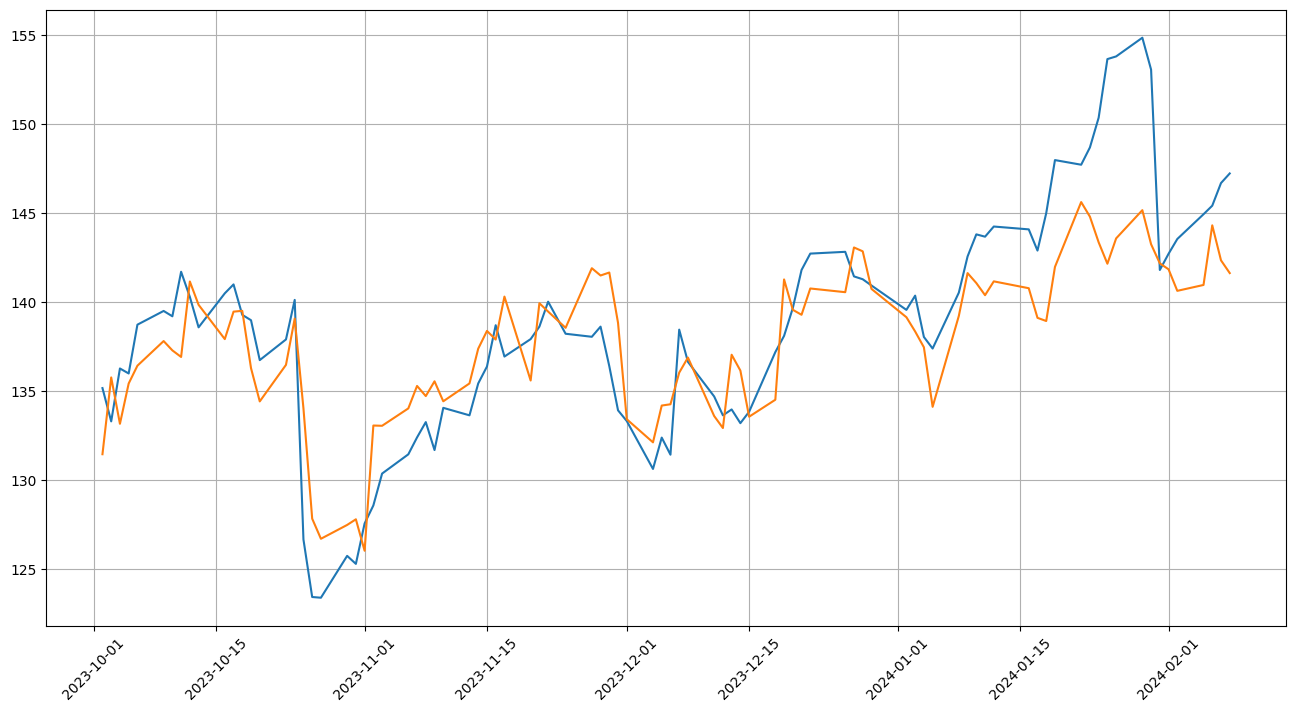

In [10]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

plt.plot(meta.loc['2023-10':, ['close_price']])
plt.plot(y_pred_df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [11]:
err = pd.DataFrame({
    'abs_err': abs(y_pred_df[0] - y_test['close_price']),
    'rel_err': abs(y_pred_df[0] / y_test['close_price'] - 1) * 100
})
err.mean()

abs_err    2.756814
rel_err    1.965409
dtype: float64

In [12]:
# X_train = meta.loc[:'2023-10-01', list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_train = meta.loc[:'2023-10-01', ['open_price', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_train = meta.loc[:'2023-10-01', ['volume']]

# X_test = meta.loc['2023-10-01':, list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_test = meta.loc['2023-10-01':, ['open_price', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_test = meta.loc['2023-10-01':, ['volume']]

y_pred = model_xgb.fit(X_train, y_train).predict(X_test)

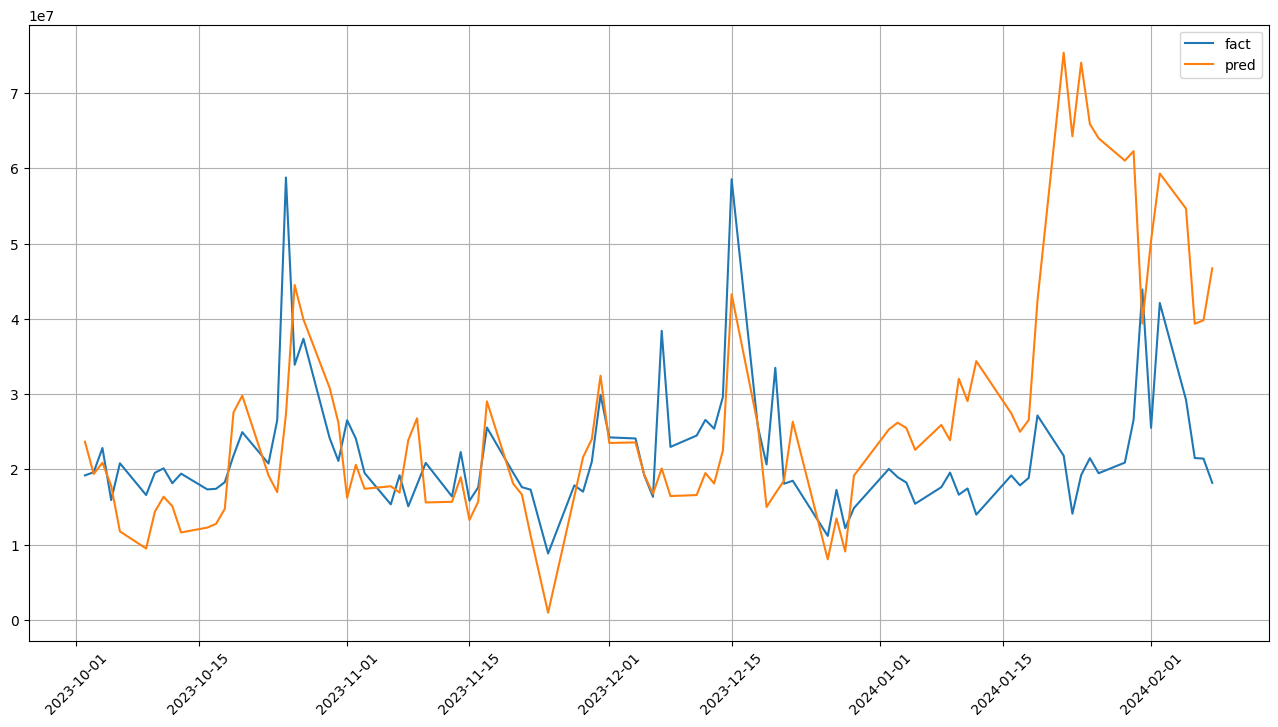

In [13]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

plt.plot(y_test, label='fact')
plt.plot(y_pred_df, label='pred')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [14]:
err = pd.DataFrame({
    'abs_err': abs(y_pred_df[0] - y_test['volume']),
    'rel_err': abs(y_pred_df[0] / y_test['volume'] - 1) * 100
})
err

,abs_err,rel_err
date,,
2023-10-02,4475254.0,23.295996
2023-10-03,237216.0,1.208516
2023-10-04,1955100.0,8.556985
2023-10-05,1905672.0,11.968121
2023-10-06,9053479.0,43.485991
...,...,...
2024-02-02,17211800.0,40.866730
2024-02-05,25403608.0,86.836879
2024-02-06,17837448.0,82.896629


In [19]:
new_df = meta.copy()

for idx in y_pred_df.index:
    new_df.loc[idx, 'volume'] = y_pred_df.loc[idx].values

C:\Users\Admin\AppData\Local\Temp\ipykernel_14652\4110803337.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8051906.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[idx, 'volume'] = y_pred_df.loc[idx].values


In [25]:
# X_train = meta.loc[:'2023-10-01', list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_train = new_df.loc[:'2023-10-01', ['open_price', 'volume', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_train = new_df.loc[:'2023-10-01', ['close_price']]

# X_test = meta.loc['2023-10-01':, list(set(meta.columns)-set(['close_price', 'adj_close_price']))]
X_test = new_df.loc['2023-10-01':, ['open_price', 'volume', 'year', 'month', 'day', 'day_of_week', 'week_of_year']]
y_test = new_df.loc['2023-10-01':, ['close_price']]

y_pred = model_xgb.fit(X_train, y_train).predict(X_test)

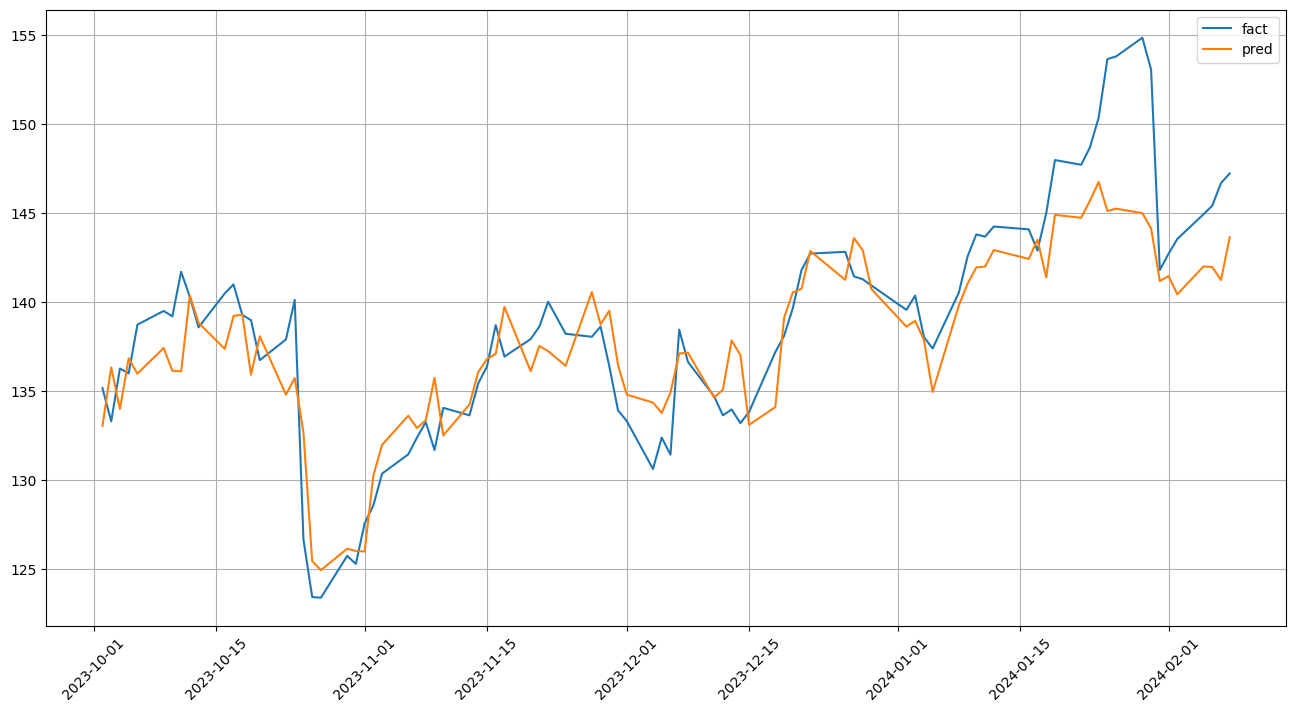

In [31]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

plt.plot(y_test, label='fact')
plt.plot(y_pred_df, label='pred')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [29]:
err = pd.DataFrame({
    'abs_err': abs(y_pred_df[0] - y_test['close_price']),
    'rel_err': abs(y_pred_df[0] / y_test['close_price'] - 1) * 100
})
err.mean()

abs_err    2.278300
rel_err    1.620129
dtype: float64